C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


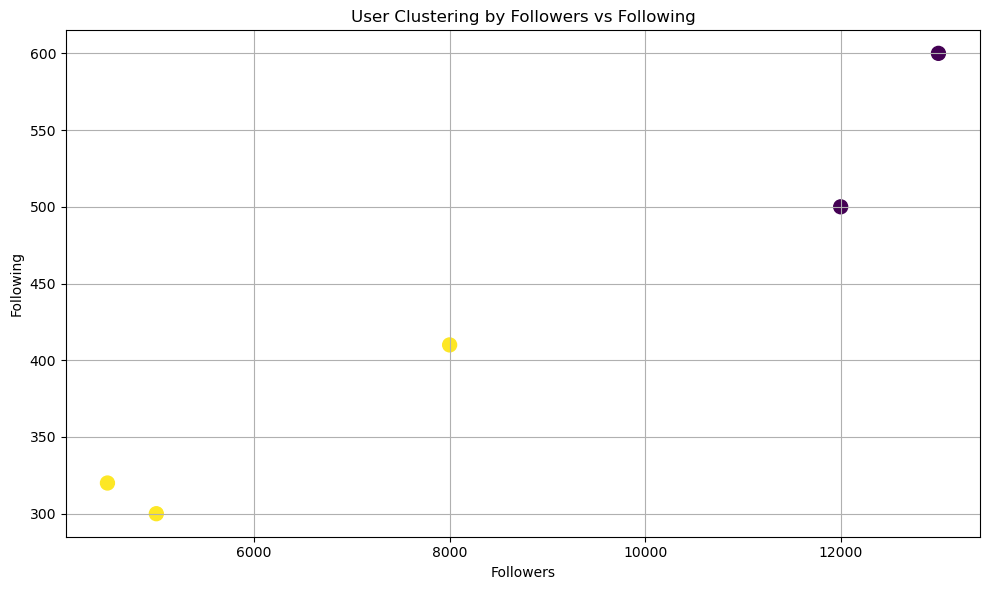

C:\Users\bjack\AppData\Local\Temp\ipykernel_4144\2172783654.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


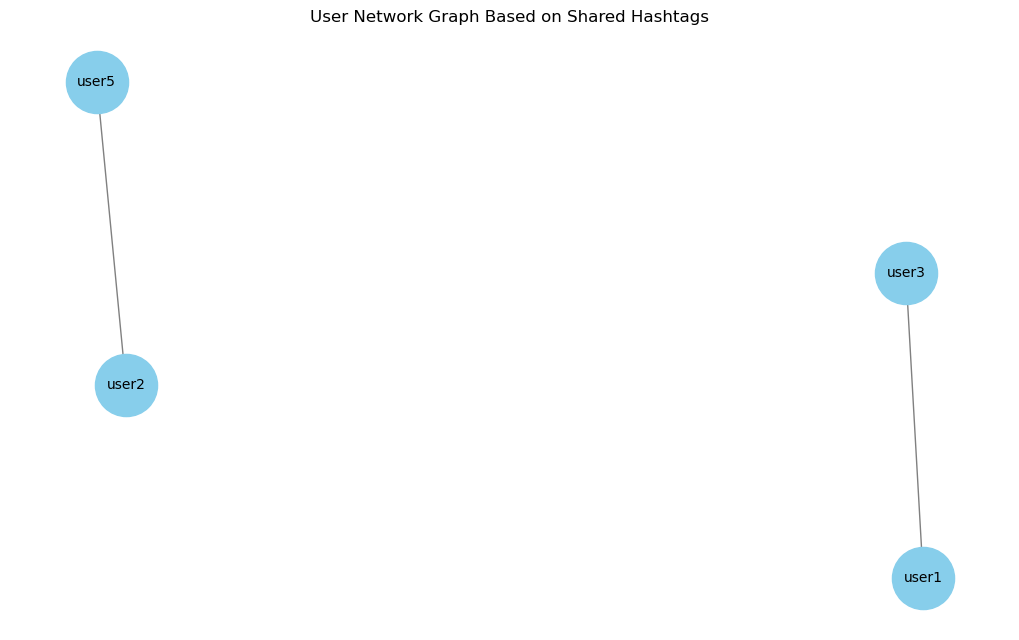

ModuleNotFoundError: No module named 'ace_tools'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = {
    "username": ["user1", "user2", "user3", "user4", "user5"],
    "hashtags": [
        "#fitness #health #workout",
        "#fashion #style #ootd",
        "#fitness #gym #motivation",
        "#funny #meme #relatable",
        "#fashion #design #model"
    ],
    "followers": [5000, 12000, 4500, 8000, 13000],
    "following": [300, 500, 320, 410, 600],
    "bio": [
        "Fitness enthusiast. Sharing my journey.",
        "Style blogger & fashion designer.",
        "Gym rat. Motivation daily!",
        "Posting memes and relatable content.",
        "Runway model and fashion lover."
    ]
}

df = pd.DataFrame(data)

vectorizer = TfidfVectorizer()
hashtag_matrix = vectorizer.fit_transform(df['hashtags'])
hashtag_similarity = cosine_similarity(hashtag_matrix)

scaler = StandardScaler()
numerical_features = scaler.fit_transform(df[['followers', 'following']])

combined_features = np.hstack((hashtag_matrix.toarray(), numerical_features))

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(combined_features)
df['cluster'] = clusters

sil_score = silhouette_score(combined_features, clusters)

G = nx.Graph()
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        sim = hashtag_similarity[i][j]
        if sim > 0.2: 
            G.add_edge(df['username'][i], df['username'][j], weight=sim)

plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['following'], c=df['cluster'], cmap='viridis', s=100)
plt.title('User Clustering by Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
plt.title('User Network Graph Based on Shared Hashtags')
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Instagram User Clustering and Network Data", dataframe=df)

sil_score
